In [8]:
import pandas as pd


df = pd.read_csv('./datasets/Game_of_Thrones.csv', sep=';')
df

,Season,No. of Episode (Season),IMDb Rating,Rotten Tomatoes Rating (Percentage)
0,1,1,8.9,100
1,1,2,8.6,100
2,1,3,8.5,81
3,1,4,8.6,100
4,1,5,9.0,95
...,...,...,...,...
68,8,2,7.9,87
69,8,3,7.5,74
70,8,4,5.5,58
71,8,5,6.0,49


In [9]:
df.columns

Index(['Season', 'No. of Episode (Season)', 'IMDb Rating',
       'Rotten Tomatoes Rating (Percentage)'],
      dtype='object')

In [10]:
df['Season'] = df.Season.apply(lambda x: f'Season {x}')
df['Episode'] = df['No. of Episode (Season)'].apply(lambda x: f'E{x}')

In [13]:
df.head(2)

,Season,IMDb Rating,Rotten Tomatoes Rating (Percentage),Episode
0,Season 1,8.9,100,E1
1,Season 1,8.6,100,E2


In [12]:
df.drop(['No. of Episode (Season)'], axis='columns', inplace=True)

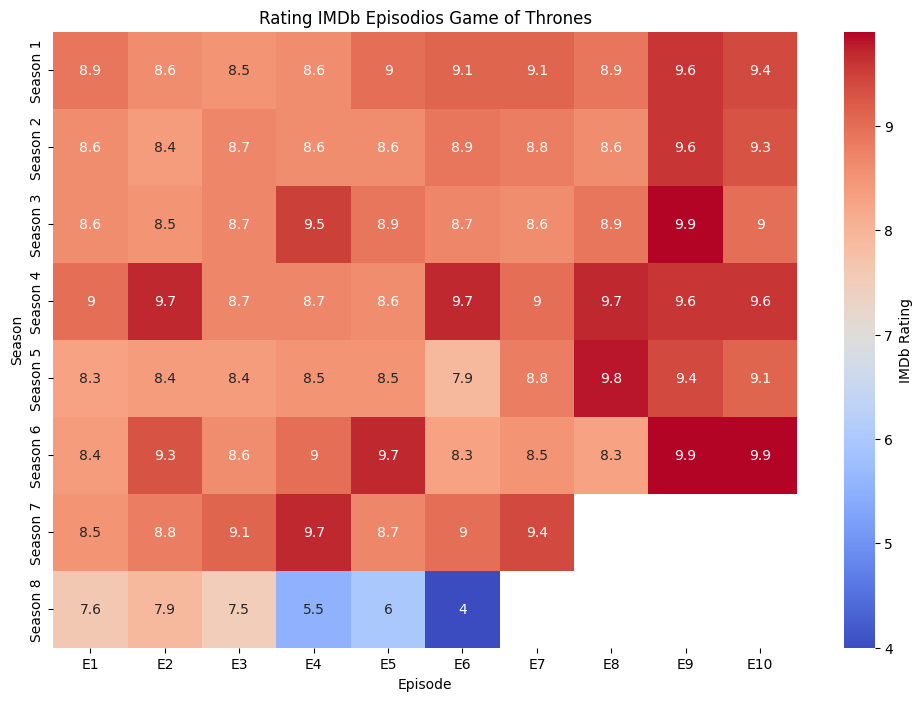

In [17]:
import seaborn as sns

import matplotlib.pyplot as plt

# Pivot the dataframe to get the desired format for the heatmap
pivot_df = df.pivot(index="Season", columns="Episode", values="IMDb Rating")

# Order the episodes
pivot_df = pivot_df.reindex(sorted(pivot_df.columns, key=lambda x: int(x[1:])), axis=1)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", cbar_kws={'label': 'IMDb Rating'})
plt.title('Rating IMDb Episodios Game of Thrones')
plt.show()